In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [6]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [7]:
df.shape

(29922, 6)

In [8]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [9]:
df['ordered_at']=pd.to_datetime(df['ordered_at'])

In [10]:
for i in range(df['price'].shape[0]):
    df['price'][i]=df['price'][i].split("$")[1]
df['price']= df['price'].astype(float)
for i in range(df['line_total'].shape[0]):
    df['line_total'][i]=df['line_total'][i].split("$")[1]
df['line_total']= df['line_total'].astype(float)

/var/folders/3w/bdh617kd7hl9m9ksms4l5rg80000gn/T/ipykernel_2668/3898073157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][i]=df['price'][i].split("$")[1]
/var/folders/3w/bdh617kd7hl9m9ksms4l5rg80000gn/T/ipykernel_2668/3898073157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['line_total'][i]=df['line_total'][i].split("$")[1]


In [11]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [12]:
df[df.duplicated()].shape[0]

538

In [13]:
df.drop_duplicates(keep = 'first', inplace = True)

In [14]:
df.isnull().sum()

order_id         0
name          1481
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [15]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


In [16]:
df=df.dropna()
df.shape

(27903, 6)

#### Sanity check for value ranges and to check assumptions

In [17]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [18]:
df[df['line_total'] < 0].shape[0]

279

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [19]:
arr=df[(df['price'] * df['quantity']) != df['line_total']]
arr.index
df.drop(arr.index,inplace=True)

In [20]:
df=df[df['line_total']>0]

In [21]:
df.shape

(27596, 6)

In [22]:
line_total= df['price']*df['quantity']

In [23]:
y=line_total==df['line_total']
df=df[y]


In [24]:
df=df[df['line_total']>0]

In [25]:
df.shape

(27596, 6)

In [26]:
df[df['line_total']==line_total].shape

(27596, 6)

In [27]:
df.describe()

,order_id,price,quantity,line_total
count,27596.000000,27596.000000,27596.000000,27596.000000
mean,14993.365995,2.511596,2.000833,5.028845
std,2888.622150,1.059402,0.819472,3.085841
min,10000.000000,0.500000,1.000000,0.500000
25%,12499.000000,1.500000,1.000000,2.500000
50%,14972.500000,2.500000,2.000000,4.500000
75%,17506.250000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [28]:
category=df['name'].map(lambda name: re.split(r'"(.+?)"',name)[1])
df['name']= df['name'].map(lambda name: re.split(r'"(.+?)"',name)[2])
df['category']=category

In [29]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET


#### Analysis, finally!

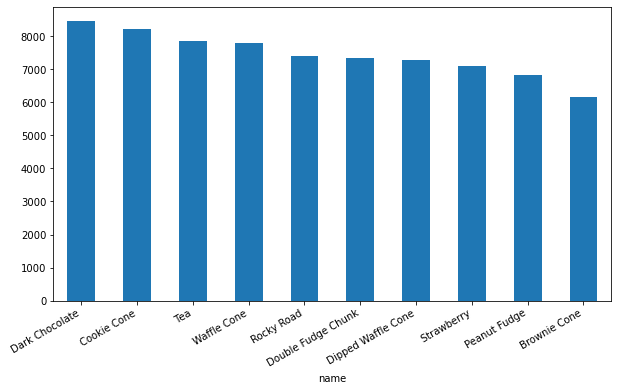

In [30]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()